In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import * 
pd.options.display.max_columns = 1000

import tensorflow as tf

%matplotlib inline

In [7]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header=None)
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header=None)

X_train = df_train.iloc[:, 1:].values/255
X_test = df_test.iloc[:, 1:].values/255
y_train = df_train.iloc[:, 0].values
y_test = df_test.iloc[:, 0].values

In [17]:
import requests
url = "https://raw.githubusercontent.com/abulbasar/machine-learning/master/Utils.py"
exec(requests.get(url).text)

In [20]:
tf.reset_default_graph()
tf.set_random_seed(1)
n_x = 784
n_y = 10
max_iters = 100

X = tf.placeholder(dtype=tf.float32, shape=(None, n_x))
y = tf.placeholder(dtype=tf.int32, shape=(None,))
print("X",X)
print("y", y)

y_oh = tf.one_hot(indices=y, depth=n_y)
print("y_oh", y_oh)


W = tf.Variable(initial_value=tf.truncated_normal(shape=[n_x, n_y], stddev=0.1))
b = tf.Variable(initial_value=tf.zeros([n_y]))

print("W", W)
print("b", b)

# Forward prop

Z = tf.matmul(X, W) + b
print("Z", Z)

y_pred = tf.argmax(Z, axis=1, output_type=tf.int32)
print("y_pred", y_pred)

accuracy = tf.reduce_mean(tf.cast(tf.equal(y, y_pred), tf.float32))
print("accuracy", accuracy)


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z, labels=y_oh))
print("cost", cost)

op = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)


init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    batchable = Batchable(X_train, y_train)
    
    scores = {}
    for i in range(max_iters): 
        X_batch, y_batch = batchable.next()
        _, cost_ = sess.run([op, cost]
                            , feed_dict = {X: X_batch, y: y_batch})
        scores[i] = cost_
        
        if i % max_iters//20 == 0 or i == max_iters - 1:
            training_accuracy_ = sess.run(accuracy, feed_dict={X: X_train, y: y_train})
            testing_accuracy_ = sess.run(accuracy, feed_dict={X: X_test, y: y_test})
            print(i,"Training accuracy", training_accuracy_,
                 "Test accuracy", testing_accuracy_)


X Tensor("Placeholder:0", shape=(?, 784), dtype=float32)
y Tensor("Placeholder_1:0", shape=(?,), dtype=int32)
y_oh Tensor("one_hot:0", shape=(?, 10), dtype=float32)
W <tf.Variable 'Variable:0' shape=(784, 10) dtype=float32_ref>
b <tf.Variable 'Variable_1:0' shape=(10,) dtype=float32_ref>
Z Tensor("add:0", shape=(?, 10), dtype=float32)
y_pred Tensor("ArgMax:0", shape=(?,), dtype=int32)
accuracy Tensor("Mean:0", shape=(), dtype=float32)
cost Tensor("Mean_1:0", shape=(), dtype=float32)
0 Training accuracy 0.179 Test accuracy 0.1885
1 Training accuracy 0.30781665 Test accuracy 0.3194
2 Training accuracy 0.46285 Test accuracy 0.4724
3 Training accuracy 0.58388335 Test accuracy 0.5979
4 Training accuracy 0.6485 Test accuracy 0.6636
5 Training accuracy 0.7000167 Test accuracy 0.7114
6 Training accuracy 0.7335167 Test accuracy 0.7487
7 Training accuracy 0.7482833 Test accuracy 0.7644
8 Training accuracy 0.75663334 Test accuracy 0.7709
9 Training accuracy 0.76528335 Test accuracy 0.7831
10 Trai

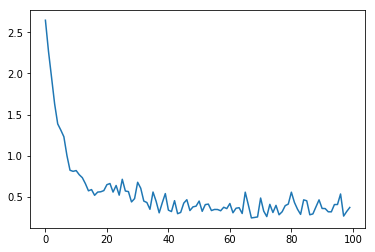

In [21]:
pd.Series(scores).plot()

In [ ]:
tf.reset_default_graph()
tf.set_random_seed(1)
n_x = 784
n_y = 10
n_h = 100
max_iters = 1000

X = tf.placeholder(dtype=tf.float32, shape=(None, n_x))
y = tf.placeholder(dtype=tf.int32, shape=(None,))
print("X",X)
print("y", y)

y_oh = tf.one_hot(indices=y, depth=n_y)
print("y_oh", y_oh)


W1 = tf.Variable(initial_value=tf.truncated_normal(shape=[n_x, n_h], stddev=0.1))
b1 = tf.Variable(initial_value=tf.zeros([n_h]))

print("W1", W1)
print("b1", b1)

# Forward prop

Z1 = tf.matmul(X, W1) + b1
print("Z", Z1)

A1 = tf.nn.relu(Z1)
print("A1", A1)


W2 = tf.Variable(initial_value=tf.truncated_normal(shape=[n_h, n_y], stddev=0.1))
b2 = tf.Variable(initial_value=tf.zeros([n_y]))

print("W2", W2)
print("b2", b2)

# Forward prop

Z2 = tf.matmul(A1, W2) + b2
print("Z2", Z2)


y_pred = tf.argmax(Z2, axis=1, output_type=tf.int32)
print("y_pred", y_pred)

accuracy = tf.reduce_mean(tf.cast(tf.equal(y, y_pred), tf.float32))
print("accuracy", accuracy)


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z2, labels=y_oh))
print("cost", cost)

op = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)


init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    batchable = Batchable(X_train, y_train)
    
    scores = {}
    for i in range(max_iters): 
        X_batch, y_batch = batchable.next()
        _, cost_ = sess.run([op, cost]
                            , feed_dict = {X: X_batch, y: y_batch})
        scores[i] = cost_
        
        if i % max_iters//20 == 0 or i == max_iters - 1:
            training_accuracy_ = sess.run(accuracy, feed_dict={X: X_train, y: y_train})
            testing_accuracy_ = sess.run(accuracy, feed_dict={X: X_test, y: y_test})
            print(i,"Training accuracy", training_accuracy_,
                 "Test accuracy", testing_accuracy_)


X Tensor("Placeholder:0", shape=(?, 784), dtype=float32)
y Tensor("Placeholder_1:0", shape=(?,), dtype=int32)
y_oh Tensor("one_hot:0", shape=(?, 10), dtype=float32)
W1 <tf.Variable 'Variable:0' shape=(784, 100) dtype=float32_ref>
b1 <tf.Variable 'Variable_1:0' shape=(100,) dtype=float32_ref>
Z Tensor("add:0", shape=(?, 100), dtype=float32)
A1 Tensor("Relu:0", shape=(?, 100), dtype=float32)
W2 <tf.Variable 'Variable_2:0' shape=(100, 10) dtype=float32_ref>
b2 <tf.Variable 'Variable_3:0' shape=(10,) dtype=float32_ref>
Z2 Tensor("add_1:0", shape=(?, 10), dtype=float32)
y_pred Tensor("ArgMax:0", shape=(?,), dtype=int32)
accuracy Tensor("Mean:0", shape=(), dtype=float32)
cost Tensor("Mean_1:0", shape=(), dtype=float32)
0 Training accuracy 0.23646666 Test accuracy 0.2433
1 Training accuracy 0.43091667 Test accuracy 0.4426


In [ ]:
pd.Series(scores).plot()